In [2]:
import tensorflow.keras.applications as models
from Dataset import *
import tensorflow as tf
import random as rn
import pandas as pd
import numpy as np
import os

sd = 123
np.random.seed(sd)
rn.seed(sd)
os.environ['PYTHONHASHSEED']=str(sd)

In [4]:
batch_size = 16
train_dt3 = data_batch(train1, cols, product = 'loose', shuffle=True, batch_size=batch_size)
val_dt3 = data_batch(val1, cols, product = 'loose', shuffle=False, batch_size=batch_size)

STEPS_PER_EPOCH = 1776 // batch_size

1776 (array([0.]), array([1776])) 2 43
196 (array([0.]), array([196])) 2 43


In [5]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes = np.unique(train1[train1['product']==0].coarse_label),
                                                 y = train1[train1['product']==0].coarse_label)
class_weights = dict(zip(np.unique(train1[train1['product']==0].coarse_label), class_weights))
a = {}
for i in range(0,43):
    if i in class_weights.keys(): a[i] = class_weights[i]
    else: a[i]=0

In [6]:
np.unique(train1[train1['product']==0].coarse_label,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]),
 array([278,  41,  45,  46,  42,  31,  32, 154,  36,  57,  21,  28,  37,
        116,  26,  22,  26,  34,  70,  16,  22,  19,  43,  28,  25,  19,
         23,  39,  38, 112,  75,  18, 127,  30]))

In [7]:
np.unique(val1[val1['product']==0].coarse_label,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 11, 12, 13, 14, 16, 17, 18, 28,
        29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42]),
 array([22,  5,  6,  5,  5,  5,  3, 20,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         4,  5,  5,  5,  4,  4,  5,  5, 15, 10,  5,  8,  5]))

In [10]:
np.unique(test1[test1['product']==0].coarse_label,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]),
 array([276,  40,  44,  45,  41,  30,  31, 153,  35,  56,  21,  27,  36,
        108,  25,  22,  25,  34,  68,  14,  22,  19,  42,  27,  25,  15,
         21,  39,  37, 110,  70,  17, 100,  29]))

In [19]:
# simple classifier
model2 = tf.keras.Sequential(
      [
        tf.keras.layers.Input(shape=(224,224,3,)),
        tf.keras.layers.Conv2D(filters=14, kernel_size=3, padding='same'),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(43, activation='softmax')
      ])


model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

es3 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                  patience=2, min_lr=0.0000001)
history2 = model3.fit(train_dt3,steps_per_epoch = STEPS_PER_EPOCH,epochs =20,
                      validation_data=val_dt3,verbose=1,callbacks=[es3])

Epoch 1/20
111/111 [==============================] - 6s 49ms/step - loss: 0.3516 - accuracy: 0.8851 - val_loss: 0.9560 - val_accuracy: 0.6939
Epoch 2/20
111/111 [==============================] - 6s 50ms/step - loss: 0.3370 - accuracy: 0.8958 - val_loss: 0.9694 - val_accuracy: 0.7143
Epoch 3/20
111/111 [==============================] - 6s 50ms/step - loss: 0.3295 - accuracy: 0.8998 - val_loss: 0.9587 - val_accuracy: 0.7398
Epoch 4/20
111/111 [==============================] - 6s 50ms/step - loss: 0.2944 - accuracy: 0.9105 - val_loss: 0.9635 - val_accuracy: 0.7398


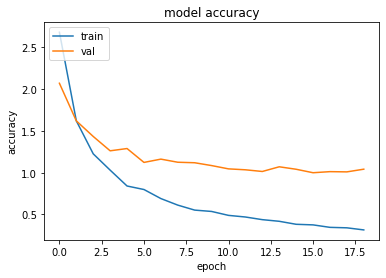

In [20]:
import matplotlib.pyplot as plt

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.4),
])

In [35]:
import tensorflow.keras.applications as models
def model_fn3(input_shape, output_shape):
    vgg16 = models.inception_v3.InceptionV3(weights='imagenet', include_top=False,input_shape=input_shape)
    vgg16.trainable = False
    input1 = tf.keras.Input(shape=(224,224,3))
    x1 = data_augmentation(input1)
    x1 = vgg16(x1)
    x1 = tf.keras.layers.GlobalAveragePooling2D()(x1)
    x1 = tf.keras.layers.Dense(512, activation='relu')(x1)
    x1 = tf.keras.layers.Dropout(0.4)(x1)
    out_all = tf.keras.layers.Dense(output_shape, activation='softmax')(x1)
    model = tf.keras.Model(input1, outputs=out_all)
    return model
model3 = model_fn3(input_shape = (224,224,3), output_shape = 43)

In [36]:
model3.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
                  loss='categorical_crossentropy',metrics=['accuracy'])
es3 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                  patience=2, min_lr=0.0000001)
history3 = model3.fit(train_dt3,steps_per_epoch = STEPS_PER_EPOCH,epochs =60,
                      validation_data=val_dt3,verbose=1,callbacks=[es3], class_weight=a)

Epoch 1/60
111/111 [==============================] - 13s 65ms/step - loss: 3.2287 - accuracy: 0.1633 - val_loss: 2.3491 - val_accuracy: 0.3724
Epoch 2/60
111/111 [==============================] - 6s 51ms/step - loss: 1.8965 - accuracy: 0.4032 - val_loss: 1.8236 - val_accuracy: 0.4694
Epoch 3/60
111/111 [==============================] - 6s 51ms/step - loss: 1.4268 - accuracy: 0.5096 - val_loss: 1.5283 - val_accuracy: 0.5408
Epoch 4/60
111/111 [==============================] - 6s 51ms/step - loss: 1.1100 - accuracy: 0.5968 - val_loss: 1.3183 - val_accuracy: 0.6327
Epoch 5/60
111/111 [==============================] - 6s 51ms/step - loss: 0.9418 - accuracy: 0.6425 - val_loss: 1.2796 - val_accuracy: 0.6071
Epoch 6/60
111/111 [==============================] - 6s 51ms/step - loss: 0.8236 - accuracy: 0.6768 - val_loss: 1.2509 - val_accuracy: 0.5867
Epoch 7/60
111/111 [==============================] - 6s 51ms/step - loss: 0.7473 - accuracy: 0.6971 - val_loss: 1.1762 - val_accuracy: 0.627

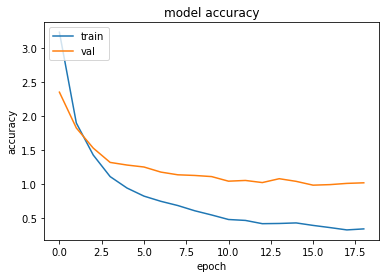

In [37]:
import matplotlib.pyplot as plt

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
test_dt3 = data_batch(test1, cols, product = 'loose', shuffle=False, batch_size=1)

y_pred3 = model3.predict(test_dt3)
y_pred4 = np.argmax(y_pred3, axis=-1)
y_true2 = np.array([int(np.argmax(y.numpy()[0], axis=-1)) for x,y in test_dt3])
y_pred4.shape,y_true2.shape

1704 (array([0.]), array([1704])) 2 43


((1704,), (1704,))

In [39]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score

pre = precision_score(y_true2,y_pred4, average='macro')
rec = recall_score(y_true2,y_pred4, average='macro')
f_score = f1_score(y_true2,y_pred4, average='macro')
acc = accuracy_score(y_true2,y_pred4)
print(pre, rec, f_score, acc)

confusion_matrix(y_pred4,y_true2)

0.6953693376627688 0.6917978518581641 0.6769710312135028 0.7083333333333334


array([[220,   1,   0, ...,   0,   9,   0],
       [  1,  25,   0, ...,   0,   1,   0],
       [  0,   1,  44, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  14,   0,   0],
       [  9,   0,   0, ...,   0,  81,   0],
       [  0,   0,   0, ...,   0,   0,  28]])

In [40]:
tf.keras.models.save_model(model3,'part3.h5')